In [25]:
# импорт библотек
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff

<h2>Задание 1.</h2>

In [232]:
df = pd.read_csv('./shopping_trends.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


К сожалению, времени на гипотезы не хватило, прошу прощения

<h2>Задание 1.2</h2>

Помимо гипотез:

* определите, какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары
* определите, есть ли зависимость между цветом одежды и сезоном.
* посчитайте наш сезонный mau (уникальных пользователей за сезон) и его динамику.
* найдите самую популярную букву в названии одежды. 

In [235]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [234]:
# 1.2.1. самый популярный товар - Blouse
df['Item Purchased'].describe(include=['object'])

count       3900
unique        25
top       Blouse
freq         171
Name: Item Purchased, dtype: object

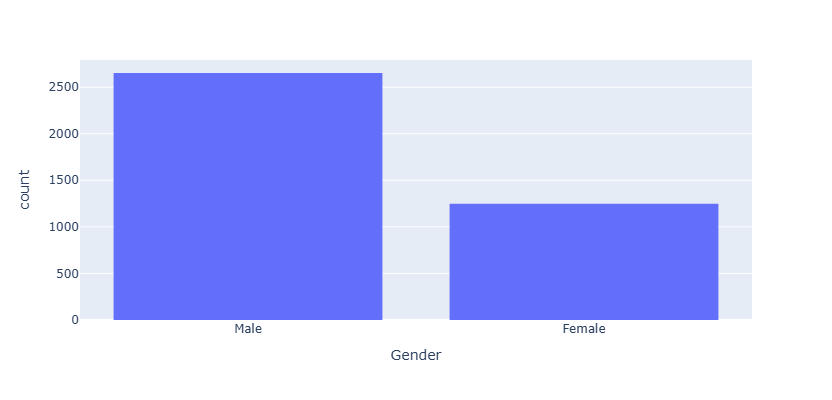

In [236]:
# 1.2.2. распределение покупателей по полу - основные покупатели - мужчины
fig = px.histogram(df, x="Gender", barmode='group', height=400)
fig.show()


In [240]:
# это очень странно, поэтому перепроверям
df['Customer ID'].duplicated(keep=False).any() # нет дубликатов по ID

False

In [241]:
df.groupby('Gender')['Customer ID'].agg('count')
# основные покупатели и правда мужчины, удивительно...

Gender
Female    1248
Male      2652
Name: Customer ID, dtype: int64

In [ ]:
# 1.2.3.1. какой пол покупает больше всего, чаще всего, самые дорогие товары

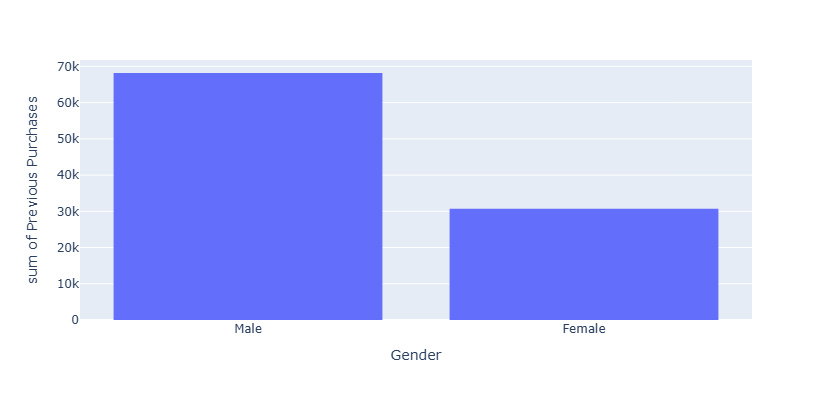

In [244]:
# больше всего покупают мужчины
fig = px.histogram(df, x="Gender", y='Previous Purchases', barmode='group', height=400)
fig.show()

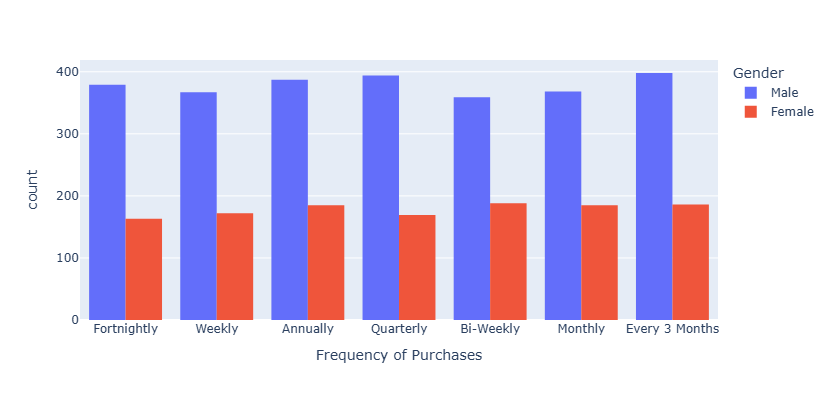

In [248]:
# чаще всего во всех категориях тоже покупают мужчины
# полагаю, влияет их число
fig = px.histogram(df, x="Frequency of Purchases", color='Gender', barmode='group', height=400)
fig.show()

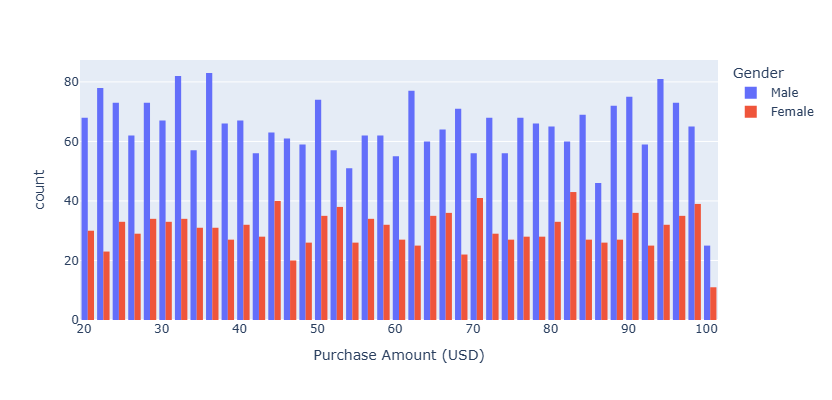

In [253]:
# самые дорогие товары покупают и женщины, и мужчины
# только мужчины чаще в 2 раза
fig = px.histogram(df, x="Purchase Amount (USD)", color='Gender', barmode='group', height=400)
fig.show()

In [252]:
df['Purchase Amount (USD)'].max()

100

In [254]:
# 1.2.3.2. какой возраст покупает больше всего, чаще всего, самые дорогие товары

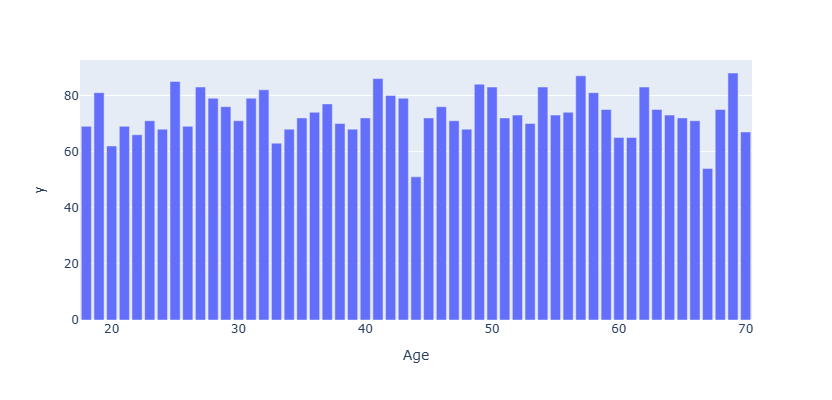

In [267]:
# здесь смотрим только нынешнее время, не считаю предыдущие покупки
# для гендера это роли не играло, а возраст со временем меняется
df_fr = df.groupby('Age')['Age'].agg('count').rename('counts')
fig = px.bar(df_fr, x=df_fr.index, y=df_fr,  height=400)
fig.show()
# больше всего на шопинг тянет под 70 лет
# жду, когда стану пенсионеркой

In [271]:
# 1.2.4. зависимость между цветом одежды и сезоном

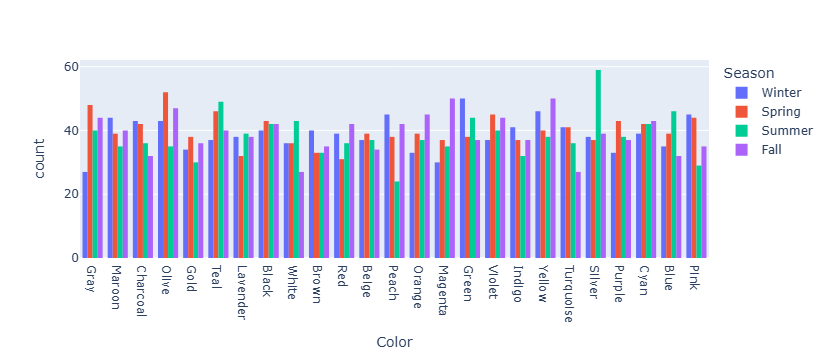

In [275]:
fig = px.histogram(df, x="Color", color='Season', barmode='group'
             )
fig.show()
# не понятно ничего

In [277]:
# значит пробуем иначе
df_c = df[['Season', 'Color']].drop_duplicates()
df_c2 = df_c.groupby('Season').agg('count')

In [278]:
df_c2 # в каждом сезоне покупаются все цвета

,Color
Season,
Fall,25
Spring,25
Summer,25
Winter,25


In [ ]:
# 1.2.5. коичество уникальных пользователей за сезон

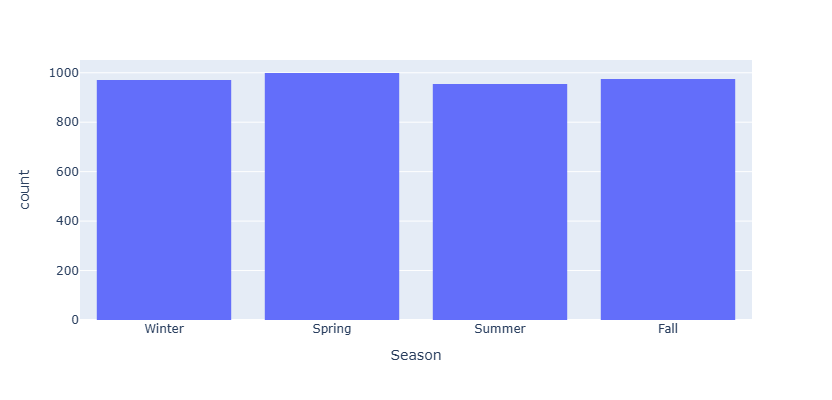

In [287]:
# мы уже увидели, что в датасете все пользователи уникальны
# поэтому
fig = px.histogram(df[['Season', 'Customer ID']], x="Season", barmode='group', height=400)
fig.show()
# от лета к весне идет повышение числа уникальных покупателей

<h1>Задание 2</h1> 

У нас есть данные о потреблении алкоголя в мире https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption. 

Загрузите их и изучите, где же люди пьют больше вина, пива и других спиртных напитков.

In [218]:
df_al = pd.read_csv('./drinks.csv')
df_al.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


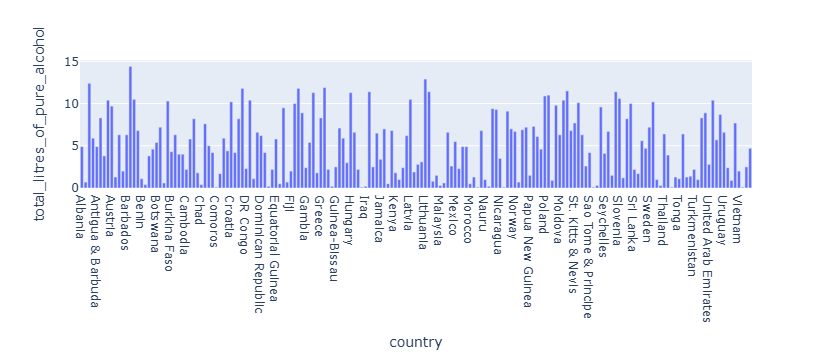

In [223]:
fig = px.bar(df_al[df_al['total_litres_of_pure_alcohol'] > 0], x="country", y='total_litres_of_pure_alcohol')
fig.show()

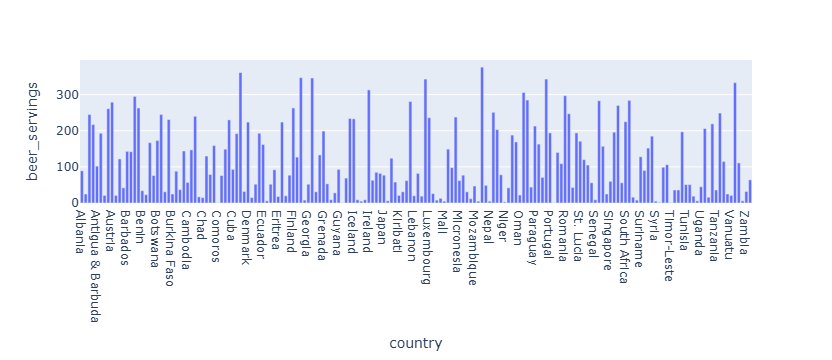

In [222]:
# больше всего пива пьют в Намибии, а не в Чехии) 
# даже при условии, что в Чехии пьют больше алкоголя в соотношении к чистому спирту
fig = px.bar(df_al[df_al['beer_servings'] > 0], x="country", y='beer_servings')
fig.show()

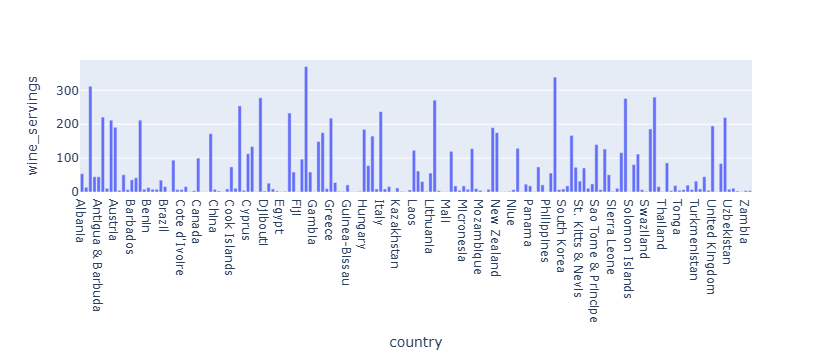

In [224]:
# Вино, очевидно, прерогатива Франции
# вина пьют меньше, чем пива, 370 - 127 = на 243 литра)
fig = px.bar(df_al[df_al['wine_servings'] > 0], x="country", y='wine_servings')
fig.show()

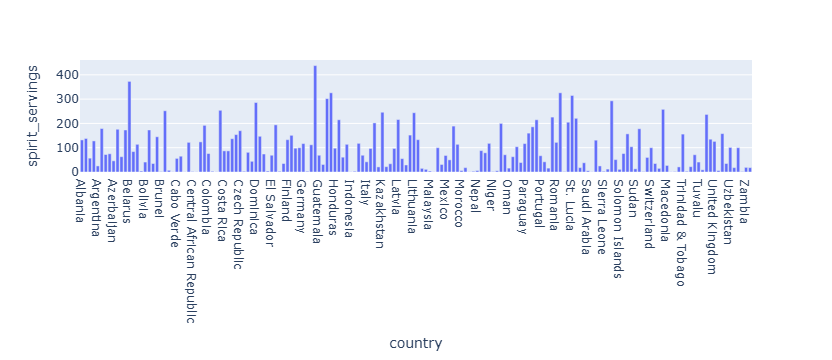

In [225]:
# ну тут в топе Гренада, Беларусь, Россия и Гаити
# в первой и последней - от хорошей жизни
# в остальных - от тягот жизни на севере
fig = px.bar(df_al[df_al['spirit_servings'] > 0], x="country", y='spirit_servings')
fig.show()

In [228]:
# стремимся стать "трезвенниками"
df_al[df_al['total_litres_of_pure_alcohol'] == 0]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
13,Bangladesh,0,0,0,0.0
46,North Korea,0,0,0,0.0
79,Iran,0,0,0,0.0
90,Kuwait,0,0,0,0.0
97,Libya,0,0,0,0.0
103,Maldives,0,0,0,0.0
106,Marshall Islands,0,0,0,0.0
107,Mauritania,0,0,0,0.0
111,Monaco,0,0,0,0.0


# Задание 3

In [2]:
# читаем датасет
df_t = pd.read_csv('./tarantino.csv')
df_t.head()

,movie,type,word,minutes_in
0,Reservoir Dogs,word,dick,0.40
1,Reservoir Dogs,word,dicks,0.43
2,Reservoir Dogs,word,fucked,0.55
3,Reservoir Dogs,word,fucking,0.61
4,Reservoir Dogs,word,bullshit,0.61


## 3.1

In [3]:
# число проклятий и летальных исходов будем определять по столбцу type
df_t.type.unique()

array(['word', 'death'], dtype=object)

In [19]:
# считаем число проклятий по фильмам,
# складываем в датафрейм, чтобы соединить с аналогичным датафреймом по летальным исходам
count_of_word = df_t[df_t.type == 'word']['movie'].value_counts() .reset_index().rename(columns={'count':'words'})
count_of_death = df_t[df_t.type == 'death']['movie'].value_counts() .reset_index().rename(columns={'count':'death'})

count_of_all = count_of_word.merge(count_of_death, how='outer', on='movie')
count_of_all['death/all ratio'] = count_of_all.apply(lambda x: 
                                                        x['death']/ (x['death'] + x['words']) if x['death'] + x['words'] > 0 else 0, axis=1)
count_of_all

,movie,words,death,death/all ratio
0,Django Unchained,262,47,0.152104
1,Inglorious Basterds,58,48,0.452830
2,Jackie Brown,368,4,0.010753
3,Kill Bill: Vol. 1,57,63,0.525000
4,Kill Bill: Vol. 2,69,11,0.137500
5,Pulp Fiction,469,7,0.014706
6,Reservoir Dogs,421,10,0.023202


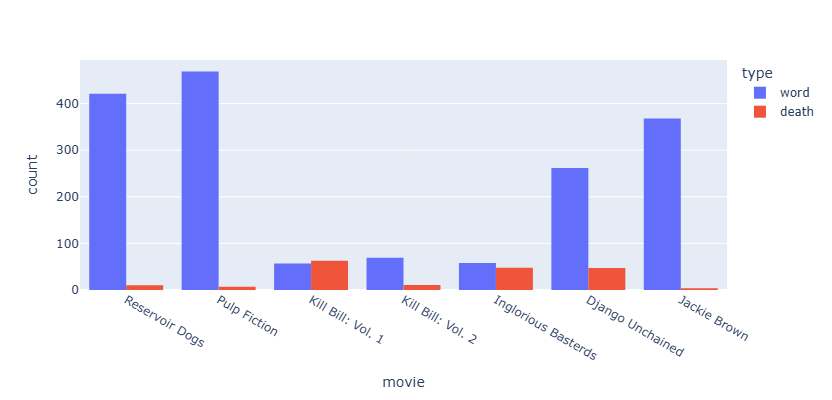

In [27]:
# определяем соотношение по фильмам проклятий и смертей на графике
fig = px.histogram(df_t, x="movie", 
             color='type', barmode='group', height=400)
fig.show()

## 3.2

In [39]:
# определяем частоту употребления конкретных проклятий 
df_t['word'].value_counts()

word
fucking          407
shit             221
fuck             213
n-word           179
ass              140
goddamn          113
motherfucker      70
bitch             64
hell              45
damn              37
motherfucking     27
fucked            25
bullshit          15
motherfuckers     15
dick              14
pussy             11
asshole           10
bastard           10
bitches            9
fucker             8
assholes           5
negro              5
dicks              5
asses              4
shitty             4
damned             3
fucks              3
shithead           3
horseshit          2
gooks              2
japs               2
cunt               2
shitload           2
cocksucker         2
wetback            2
fuckers            1
horeshit           1
jap                1
shittiest          1
fuckup             1
jackass            1
goddamned          1
slut               1
squaw              1
asshead            1
shitting           1
shitless           1
bastards

In [53]:
# для разнообразия добавляем категории проклятий,
# чтобы посмотреть, какой мат нравится Тарантино больше
df_t['word like'] = None
df_t.loc[(df_t['word'].notna()) & (df_t['word'].str.contains('fuck')), 'word like'] = 'fuck'
df_t.loc[(df_t['word'].notna()) & (df_t['word'].str.contains('ass')), 'word like'] = 'ass'
df_t.loc[(df_t['word'].notna()) & (df_t['word'].str.contains('shit')), 'word like'] = 'shit'
df_t.loc[(df_t['word'].notna()) & (df_t['word'].str.contains('damn')), 'word like'] = 'damn'
df_t.loc[(df_t['word'].notna()) & ((df_t['word'].str.contains('n-word ')) | (df_t['word'].str.contains('negro'))), 'word like'] = 'n-word '
df_t.loc[(df_t['word'].notna()) & (df_t['word like'].isna()), 'word like'] = 'others'


In [214]:
# считаем вид мата
df_t['word like'].value_counts()

word like
fuck       772
shit       252
n-word     184
others     180
ass        162
damn       154
Name: count, dtype: int64

In [215]:
# считаем вид ругательств в фильмах
df_t2 = df_t[['movie', 'word like']].groupby(['movie', 'word like']).agg({'word like':'count'}).rename(columns={'word like':'count'}).reset_index()
df_t2

,movie,word like,count
0,Django Unchained,ass,29
1,Django Unchained,damn,42
2,Django Unchained,fuck,32
3,Django Unchained,n-word,114
4,Django Unchained,others,26
5,Django Unchained,shit,19
6,Inglorious Basterds,ass,6
7,Inglorious Basterds,damn,12
8,Inglorious Basterds,fuck,21
9,Inglorious Basterds,n-word,5


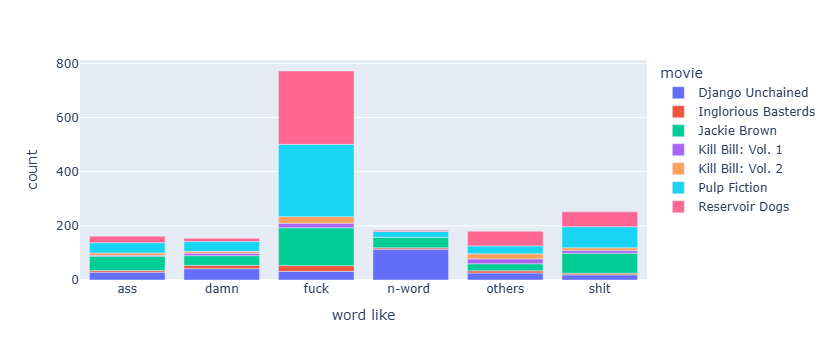

In [216]:
# строим гистограмму проклятий
fig = px.bar(df_t2, x="word like", y='count', color='movie',
             )
fig.show()

## 3.1 

распределение времени между проклятиями 

In [207]:
# Отбираем часть датафрейма без летальных исходов и сортируем по времени внутри фильма
df_а = df_t[df_t['word'].notna()].sort_values(['movie', 'minutes_in'])

In [208]:
# ищем минимальное время в фильме для корректной обработки данных
df_а['min_time'] = df_а.groupby('movie')['minutes_in'].transform('min')
# ищем разницу времени между двумя проклятиями
df_а['prev_time'] = df_а['minutes_in'].shift(1)
df_а.loc[(df_а['minutes_in'] == df_а['min_time']) == True, 'prev_time'] = 0
df_а['dif'] = df_а.minutes_in - df_а.prev_time

In [209]:
# проверка на корректность
df_а[df_а.dif < 0]

,movie,type,word,minutes_in,word like,min_time,prev_time,dif


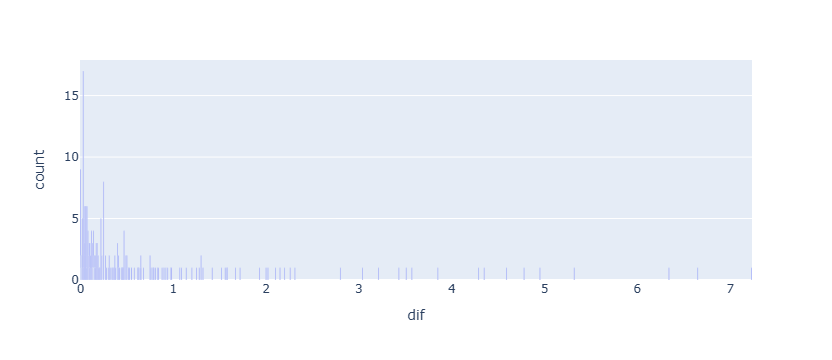

In [210]:
# для пробы строим распределение по промежуткам времени между проклятиями для фильма Django Unchained
df_p = df_а[['movie', 'dif']].groupby(['movie', 'dif'])['dif'].agg('count').rename('count').reset_index()
fig = px.bar(df_p[df_p['movie']=='Django Unchained'], x='dif', y='count',
             barmode='group')
fig.show()

In [212]:
# строим распределение среднего времени между проклятиями для всех фильмов
df_а2 = df_а[['movie', 'dif']].groupby(['movie'])['dif'].agg(list)

D:\python\Lib\site-packages\plotly\figure_factory\_distplot.py:30: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

D:\python\Lib\site-packages\plotly\figure_factory\_distplot.py:330: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

D:\python\Lib\site-packages\plotly\figure_factory\_distplot.py:361: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

D:\python\Lib\site-packages\plotly\figure_factory\_distplot.py:434: FutureWarning:

Series.__ge

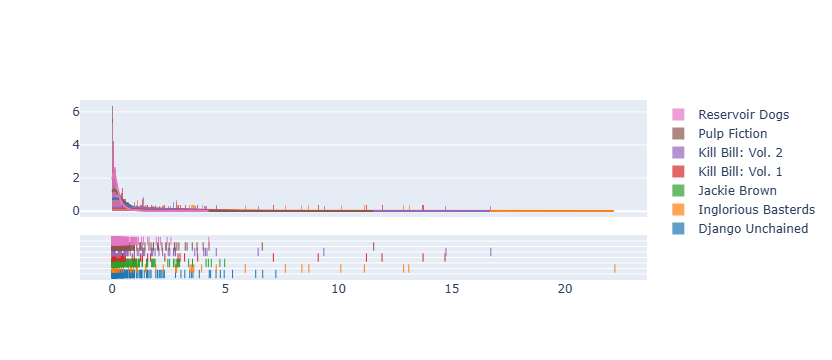

In [213]:
fig = ff.create_distplot(df_а2, df_а2.index, bin_size=.05,
                         show_curve=True)

fig.show()
# по оси x - время между проклятиями в секундах
# по оси y - распределение временных промежутков